# Data visualization in Python

In [156]:
# Load libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading a Star Wars dataset

In [157]:
df = pd.read_csv('data/starwars.tsv', sep='\t')

In [158]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,age,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


# Bar plots

## How many characters per species?


In [125]:
species_counts = df['species'].value_counts()
species_counts.head()


Human       35
Droid        6
Gungan       3
Mirialan     2
Wookiee      2
Name: species, dtype: int64

In [126]:
species_counts = species_counts.reset_index() # moves the current index to its own column

In [127]:
species_counts.head()

,index,species
0,Human,35
1,Droid,6
2,Gungan,3
3,Mirialan,2
4,Wookiee,2


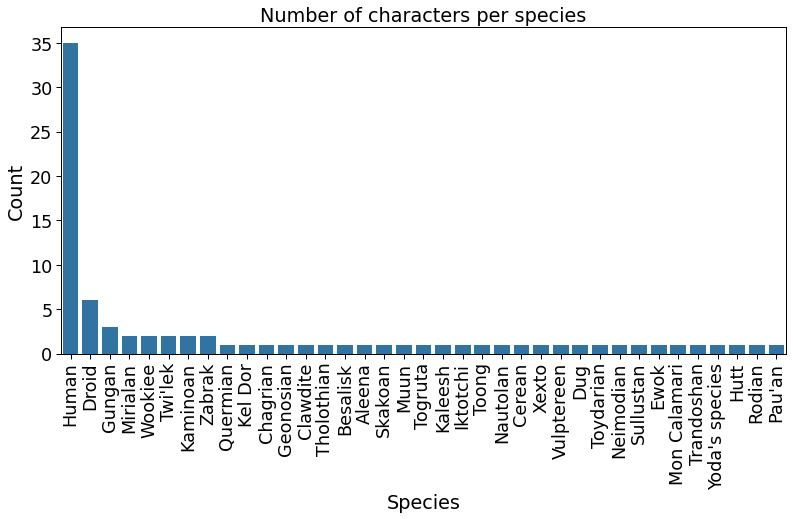

In [128]:
plt.figure(figsize=(13, 6))
sns.barplot(data=species_counts, x='index', y='species')
plt.title('Number of characters per species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## How many characters per homeworld?

Try to recreate this plot:

pythonviz1.png

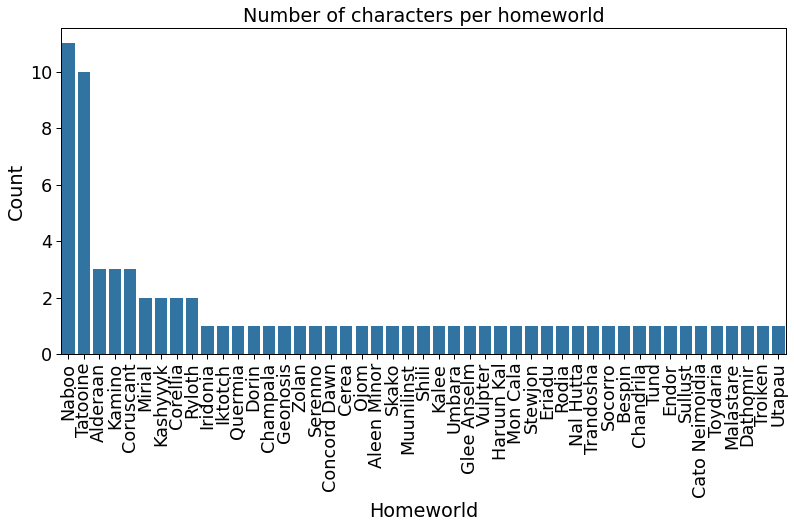

In [201]:
home_counts = df['homeworld'].value_counts().reset_index()

plt.figure(figsize=(13, 6))
sns.barplot(data=home_counts, x='index', y='homeworld')
plt.title('Number of characters per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## How many characters per sex?

Using a custom color palette

In [129]:
sex_counts = df['sex'].value_counts().reset_index()


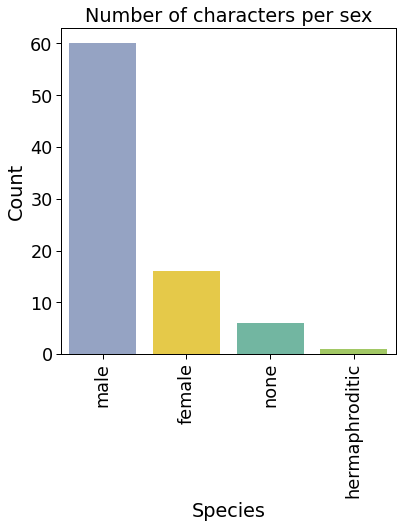

In [130]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal


plt.figure(figsize=(6, 6)) # doesn't need to be as wide
sns.barplot(data=sex_counts, x='index', y='sex', hue = 'index', palette=c_dict)
plt.title('Number of characters per sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## How many human characters in each homeworld?

In [131]:
# Filter dataframe for human characters
df_human = df[df['species'] == 'Human']
home_counts = df_human['homeworld'].value_counts().reset_index()


In [132]:
len(home_counts)

15

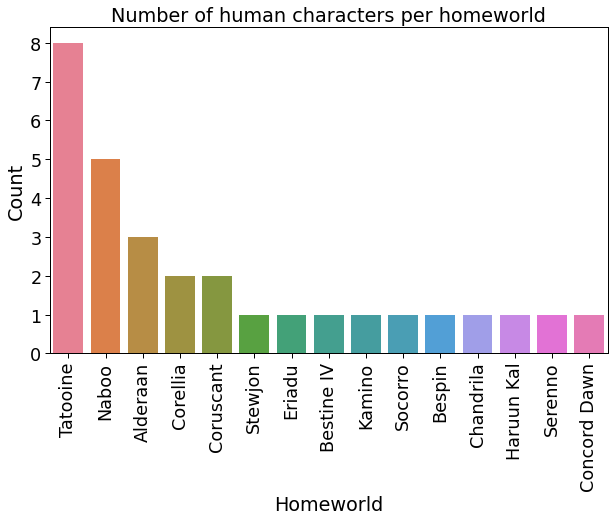

In [133]:
palette = sns.color_palette("husl", len(home_counts)) # generate custom color palette with 15 colors

plt.figure(figsize=(10, 6))
sns.barplot(data=home_counts, x='index', y='homeworld', hue = 'index', palette=palette)
plt.title('Number of human characters per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## What is the average height across species? 

In [134]:
# Group by species and calculate mean height
species_height = df.groupby('species')['height'].mean().reset_index()
species_height.head()

,species,height
0,Aleena,79.0
1,Besalisk,198.0
2,Cerean,198.0
3,Chagrian,196.0
4,Clawdite,168.0


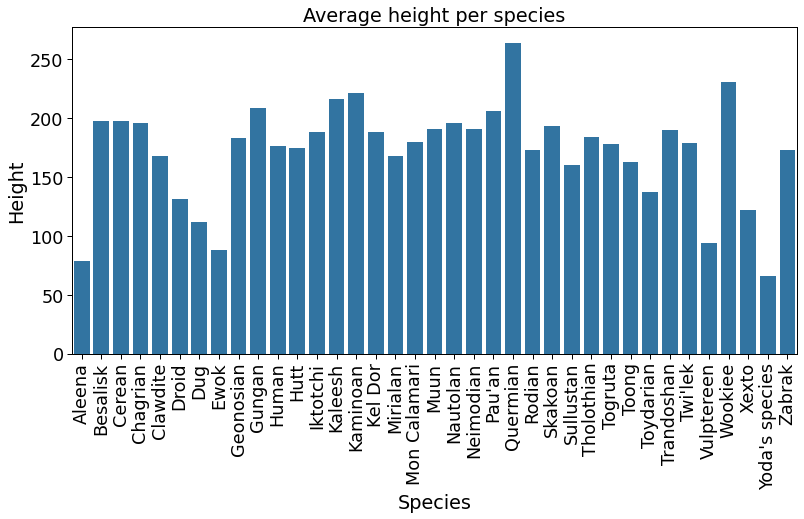

In [144]:
plt.figure(figsize=(13, 6))
sns.barplot(data=species_height, x='species', y='height')
plt.title('Average height per species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()


### Sort df from shortest to tallest and plot

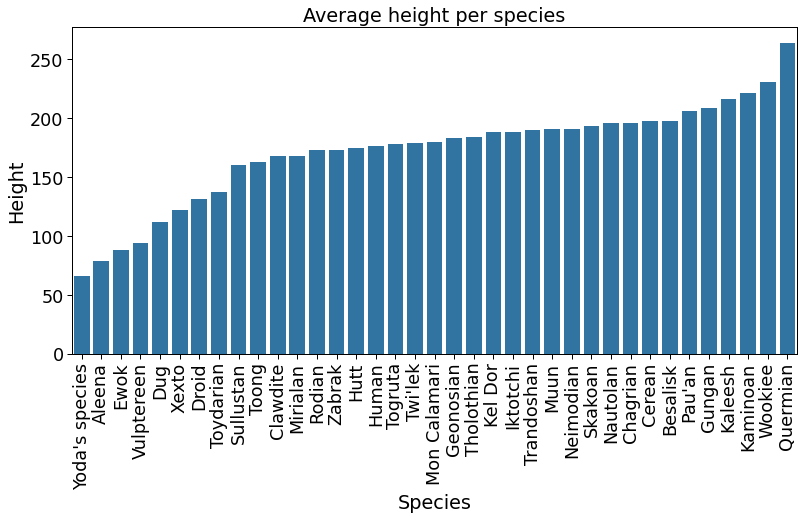

In [150]:
species_height_sorted = species_height.sort_values(by='height')

plt.figure(figsize=(13, 6))
sns.barplot(data=species_height_sorted, x='species', y='height')
plt.title('Average height per species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()


## What is the average age in humans by homeworld?
Try to recreate this plot:

pythonviz2.png

Use the `viridis` color palette.

In [159]:
# Group by species and calculate mean height
age_homeworld = df[df['species'] == 'Human'].groupby('homeworld')['age'].mean().reset_index()
age_homeworld_sorted = age_homeworld.sort_values(by='age')


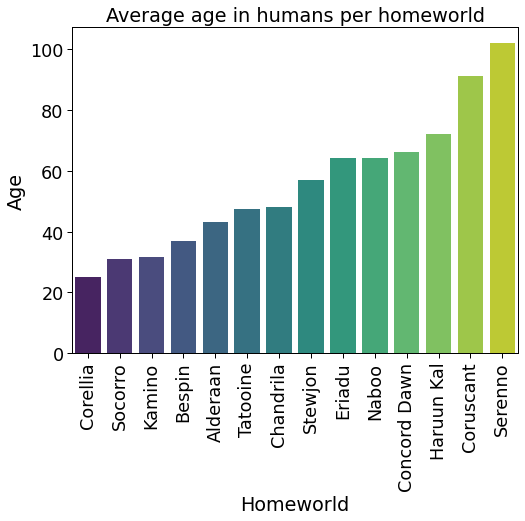

In [160]:
palette = sns.color_palette("viridis", len(age_homeworld_sorted))

plt.figure(figsize=(8, 6))
sns.barplot(data=age_homeworld_sorted, x='homeworld', y='age', hue = 'homeworld', palette=palette)
plt.title('Average age in humans per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


# Scatter plots

## Compare height vs. mass by sex

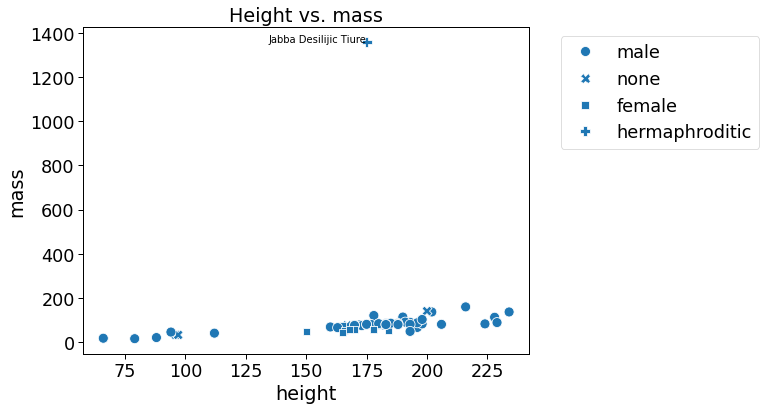

In [197]:
# Scatter plot of height vs. mass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height', y='mass', style='sex', s = 100) # s = size of point

plt.title('Height vs. mass')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

     
# Annotate points with mass above 1000
for index, row in df.iterrows():
    if row['mass'] > 1000:
        plt.text(row['height'], row['mass'], row['name'], horizontalalignment='right')


        
plt.show()


## Compare height vs. mass in humans
Make shape of point reflect sex and color reflect homeworld

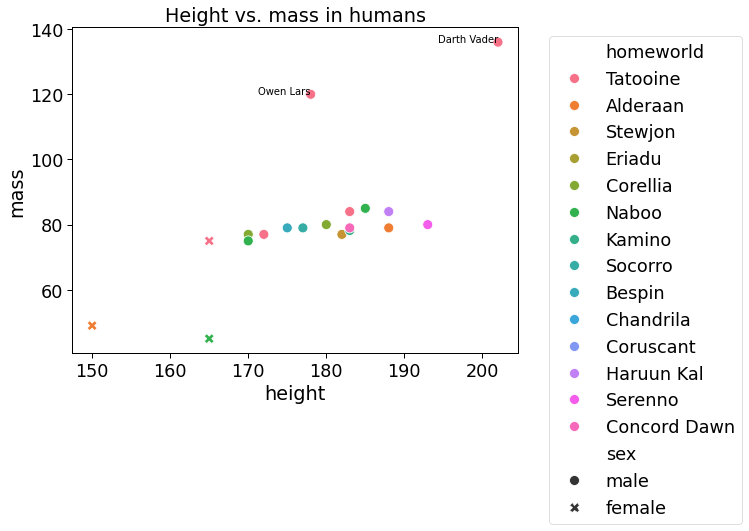

In [196]:
plt.figure(figsize=(8, 6))
df_human = df[df['species'] == 'Human']
sns.scatterplot(data=df_human, x='height', y='mass', hue='homeworld', style='sex', s = 100)
plt.title('Height vs. mass in humans')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

# Annotate points with mass above 1000
for index, row in df_human.iterrows():
    if row['mass'] > 100:
        plt.text(row['height'], row['mass'], row['name'], horizontalalignment='right')
        
plt.show()


# Loading an RNA-seq dataset

These data include normalized gene expression values, results of differential expression testing, and principal component scores. We need to select appropriate columns for each of the following plots.


# Heatmap

# Volcano plot

# PCA